### Imports & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
import scipy
from scipy import stats
from scipy.stats import skew 
from scipy.stats import kurtosis 

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
red_wine_no_out = pd.read_csv(r"C:\Users\janin\OneDrive\Desktop\Python exercise\Project 2\red_wine_no_out.csv", sep=',')

### Split Data


In [4]:
red_wine_no_out1 = red_wine_no_out.drop(['quality','type'], axis=1)

C:\Users\janin\AppData\Local\Temp\ipykernel_19320\2520825770.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=red_wine_no_out, x='quality', ax=axes[0], palette='Purples').set_title("Class Distribution Before SMOTE", fontsize=12)
C:\Users\janin\AppData\Local\Temp\ipykernel_19320\2520825770.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axes[1], palette=palette, width=0.8).set_title("Class Distribution Before SMOTE", fontsize=12)
C:\Users\janin\AppData\Local\Temp\ipykernel_19320\2520825770.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for 

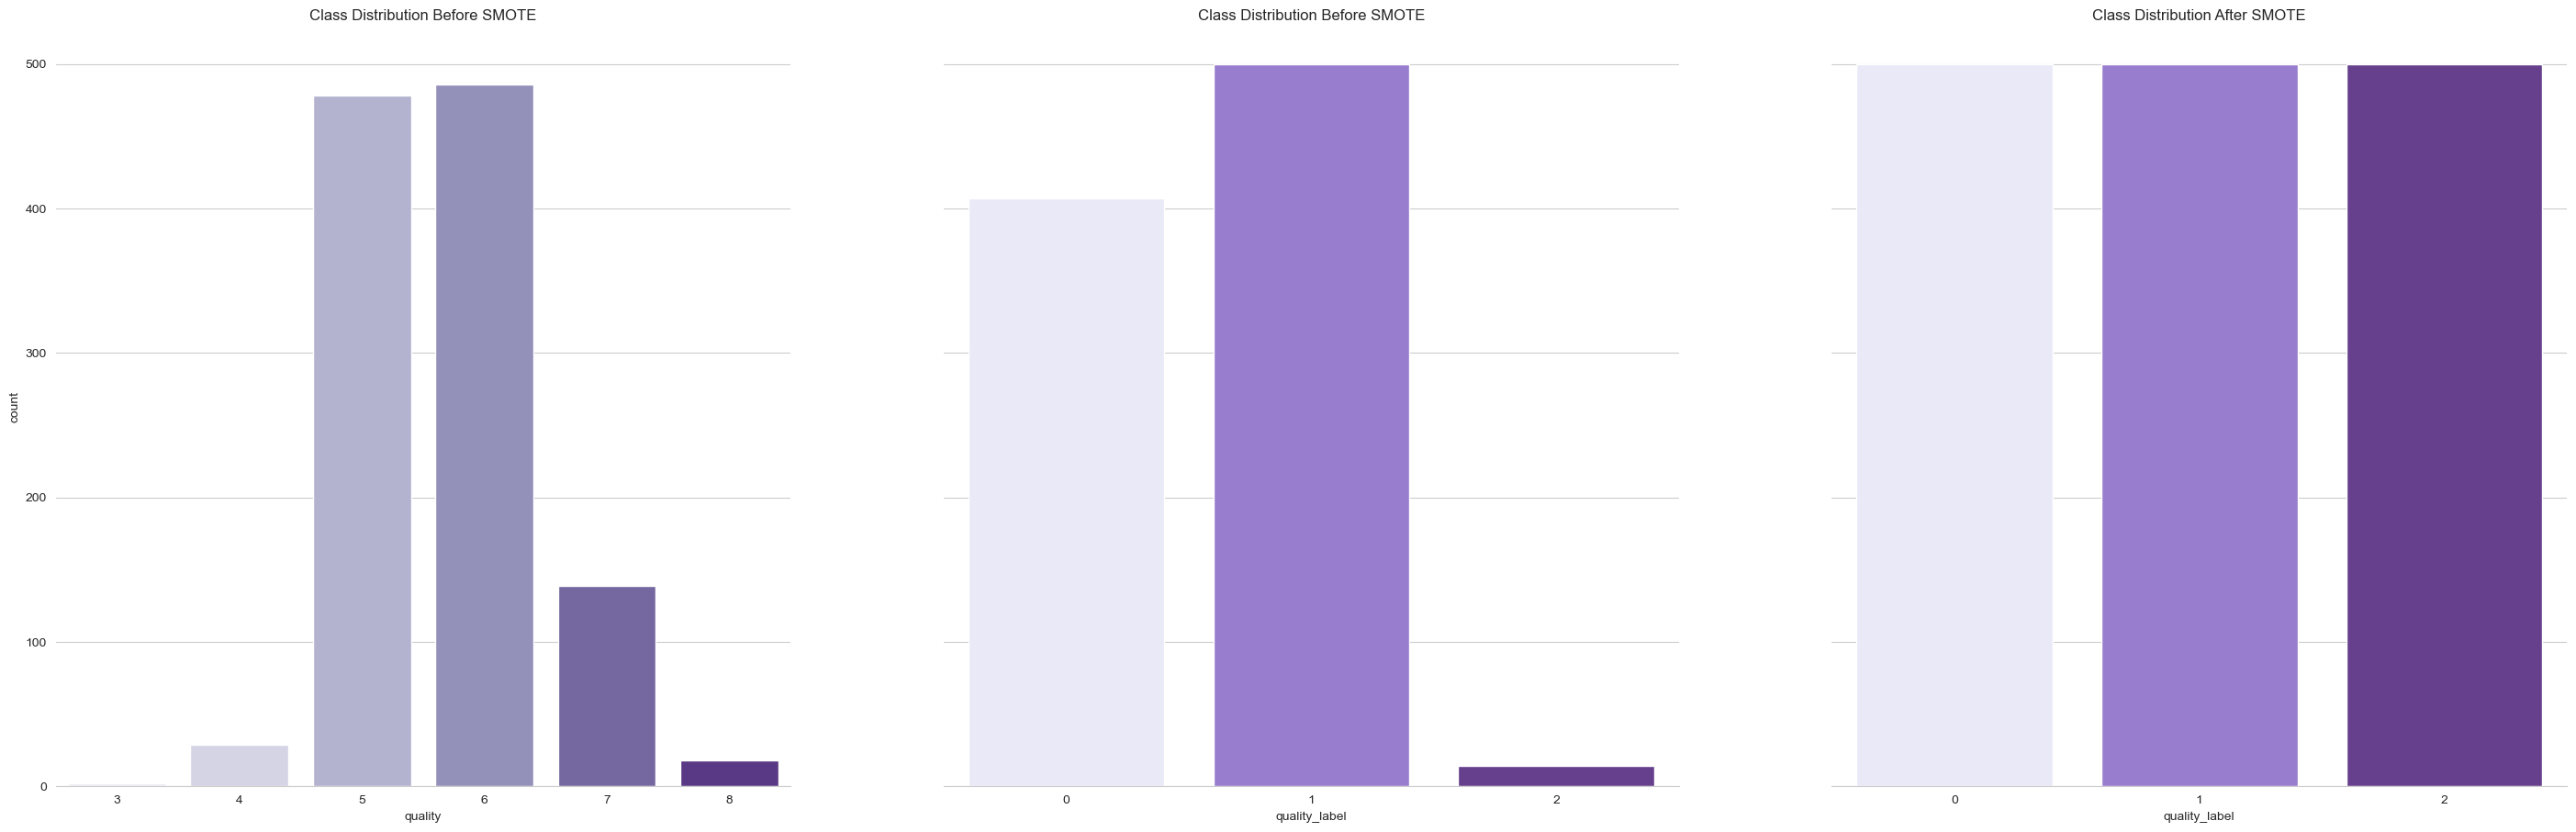

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

sns.set_style("whitegrid")


X = red_wine_no_out1.drop('quality_label', axis=1)
y = red_wine_no_out1['quality_label']

### 1. Balance Data Using SMOTE ###
# Split into train-test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Visualizing class distribution before SMOTE
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28, 9), sharey=True)
palette=['lavender', 'mediumpurple', 'rebeccapurple']
#plt.figure(figsize=(6, 4))
sns.countplot(data=red_wine_no_out, x='quality', ax=axes[0], palette='Purples').set_title("Class Distribution Before SMOTE", fontsize=12)
sns.countplot(x=y_train, ax=axes[1], palette=palette, width=0.8).set_title("Class Distribution Before SMOTE", fontsize=12)
sns.countplot(x=y_train_resampled, ax=axes[2], palette=palette, width=0.8).set_title("Class Distribution After SMOTE", fontsize=12)

sns.despine(ax=axes[0], top=True, right=True, left=True)
sns.despine(ax=axes[1], top=True, right=True, left=True)  # Remove top and rig
sns.despine(ax=axes[2], top=True, right=True, left=True)  # Remove top and rig

plt.tight_layout(pad=0.5, w_pad=12, h_pad=5.0)

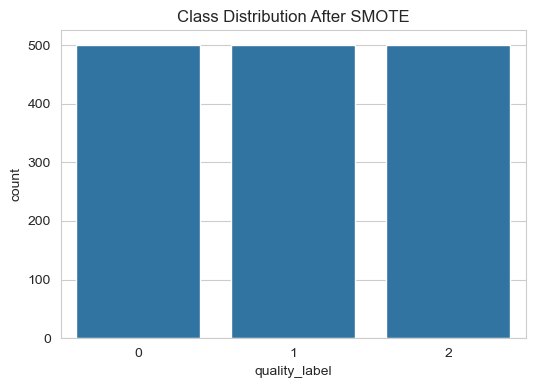

c:\Users\janin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Parameters for ANN: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}
ANN Best Accuracy: 0.7576
Classification Report for ANN:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       102
           1       0.81      0.72      0.76       125
           2       0.22      0.50      0.31         4

    accuracy                           0.76       231
   macro avg       0.59      0.68      0.62       231
weighted avg       0.77      0.76      0.76       231



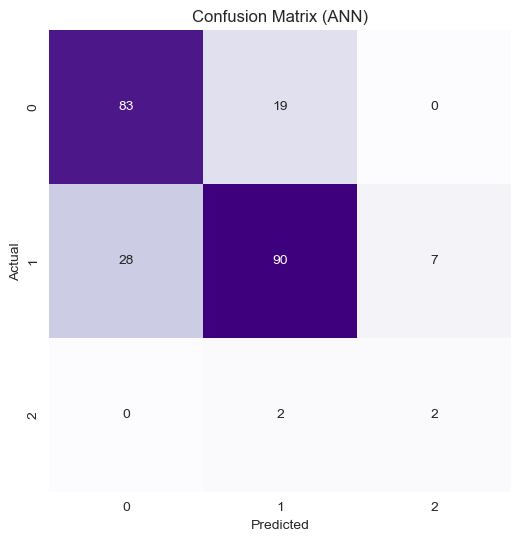

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load the dataset
X = red_wine_no_out1.drop('quality_label', axis=1)
y = red_wine_no_out1['quality_label']

# Step 1: Balance Data Using SMOTE
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Visualize class distribution after SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.show()

# Step 2: Standardization (Feature Scaling)
# Feature scaling is important for ANN models
scaler = StandardScaler()
x_train_resampled_scaled = scaler.fit_transform(x_train_resampled)
x_test_scaled = scaler.transform(x_test)

# Step 3: Hyperparameter Tuning for ANN
# Define the parameter grid for ANN
param_grid_ann = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Varying number of hidden layers and neurons
    'activation': ['relu', 'tanh'],  # Activation functions to try
    'solver': ['adam', 'sgd'],  # Different solvers for optimization
    'learning_rate': ['constant', 'adaptive'],  # Different learning rate schedules
    'max_iter': [200, 500]  # Number of iterations (epochs)
}

# Initialize the ANN model (MLPClassifier)
ann = MLPClassifier(random_state=42)

# Tune the ANN model using GridSearchCV
grid_search = GridSearchCV(ann, param_grid_ann, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_resampled_scaled, y_train_resampled)

# Best model and parameters
best_ann = grid_search.best_estimator_
print("Best Parameters for ANN:", grid_search.best_params_)

# Step 4: Model Evaluation

# Evaluate the best model on the test set
y_pred = best_ann.predict(x_test_scaled)

# Print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"ANN Best Accuracy: {accuracy:.4f}")
print("Classification Report for ANN:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", square=True, cbar=False, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix (ANN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

C:\Users\janin\AppData\Local\Temp\ipykernel_19320\3625522172.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=red_wine_no_out, x='quality', ax=axes[0], palette='Purples').set_title("Class Distribution Before SMOTE", fontsize=12)


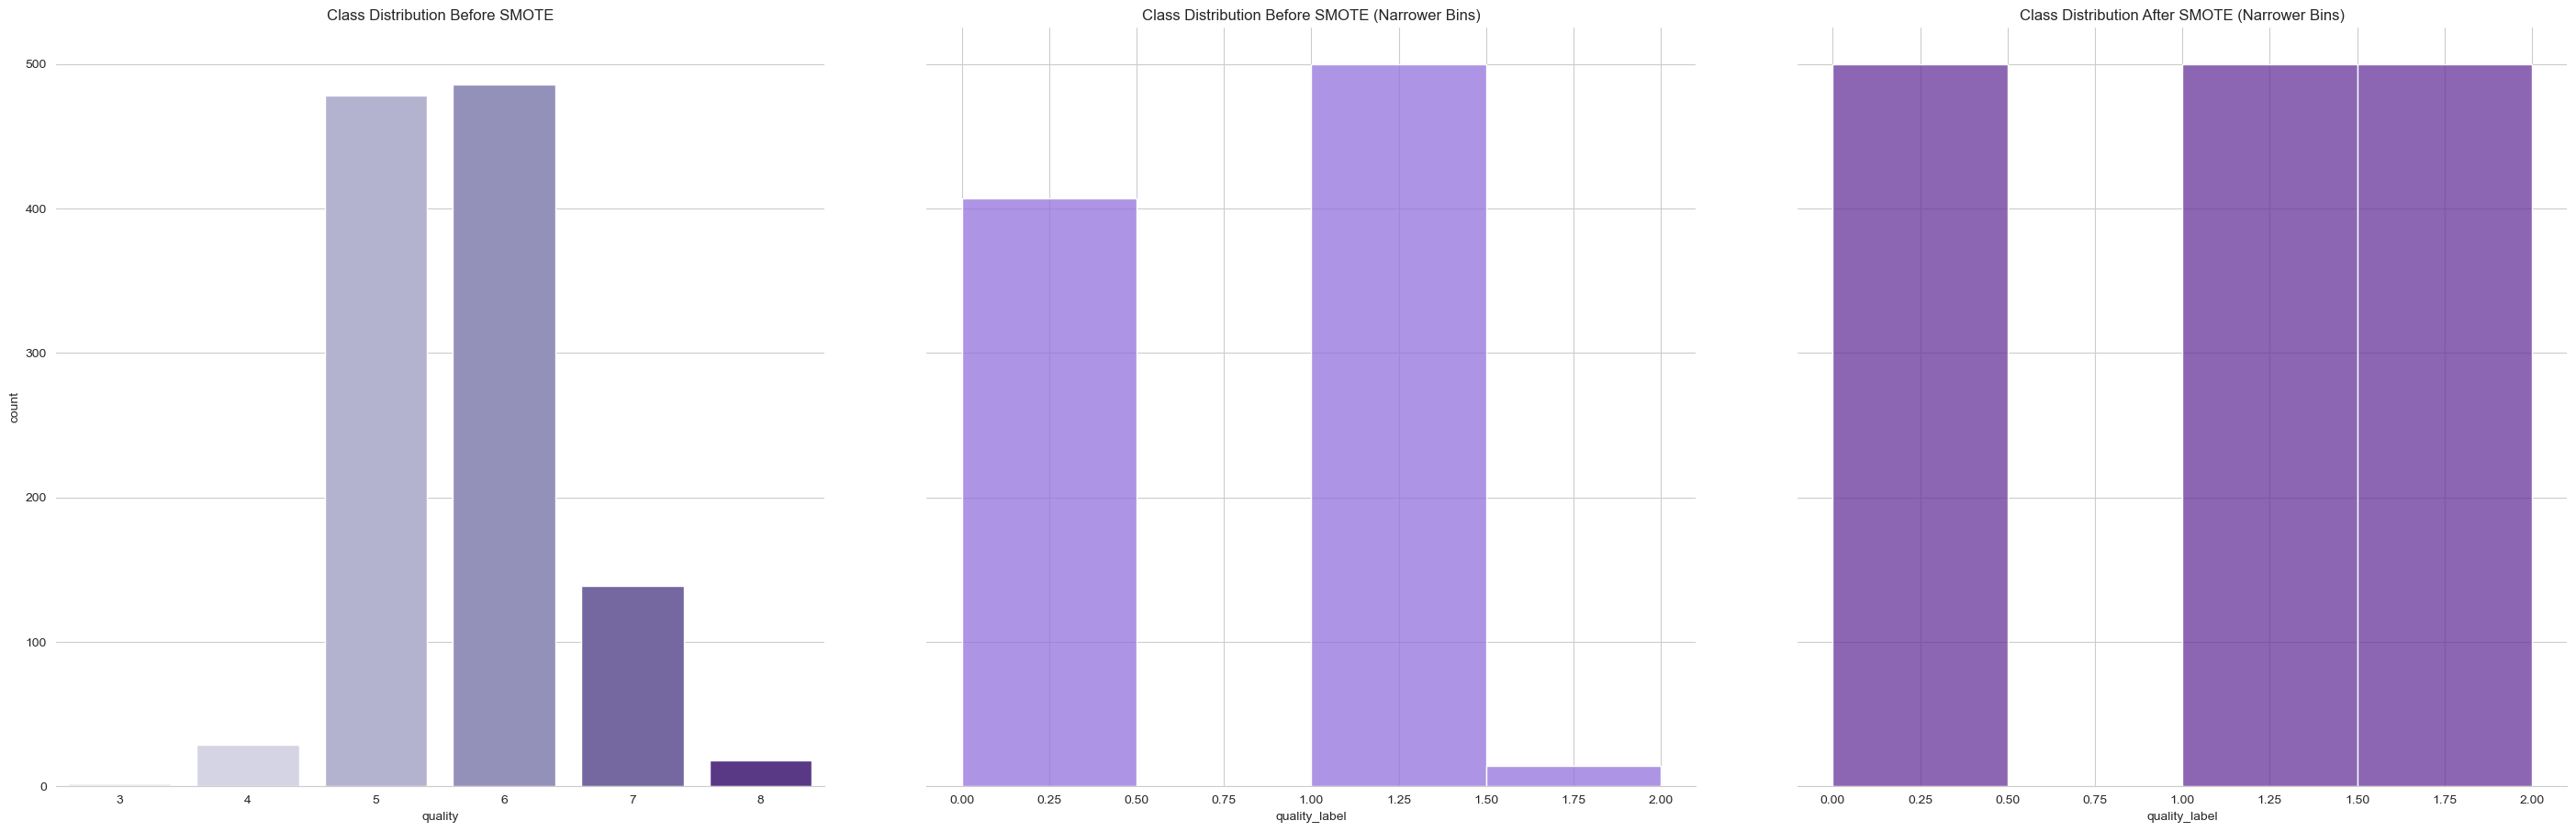

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

sns.set_style("whitegrid")

# Assuming you have the dataset already loaded
X = red_wine_no_out1.drop('quality_label', axis=1)
y = red_wine_no_out1['quality_label']

### 1. Balance Data Using SMOTE ###
# Split into train-test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Visualizing class distribution before and after SMOTE
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28, 9), sharey=True)

# Palette
palette = ['lavender', 'mediumpurple', 'rebeccapurple']

# Plot 1: Original class distribution
sns.countplot(data=red_wine_no_out, x='quality', ax=axes[0], palette='Purples').set_title("Class Distribution Before SMOTE", fontsize=12)

# Plot 2: Class distribution before SMOTE with narrower bins and wider space
sns.histplot(y_train, bins=np.arange(min(y_train), max(y_train) + 2, 1.5), ax=axes[1], color='mediumpurple', binwidth=0.5).set_title("Class Distribution Before SMOTE (Narrower Bins)", fontsize=12)

# Plot 3: Class distribution after SMOTE with narrower bins and wider space
sns.histplot(y_train_resampled, bins=np.arange(min(y_train_resampled), max(y_train_resampled) + 2, 1.5), ax=axes[2], color='rebeccapurple', binwidth=0.5).set_title("Class Distribution After SMOTE (Narrower Bins)", fontsize=12)

# Clean up axes for better visibility
sns.despine(ax=axes[0], top=True, right=True, left=True)
sns.despine(ax=axes[1], top=True, right=True, left=True)
sns.despine(ax=axes[2], top=True, right=True, left=True)

# Adjust spacing between subplots
plt.tight_layout(pad=0.5, w_pad=8, h_pad=5.0)
plt.show()


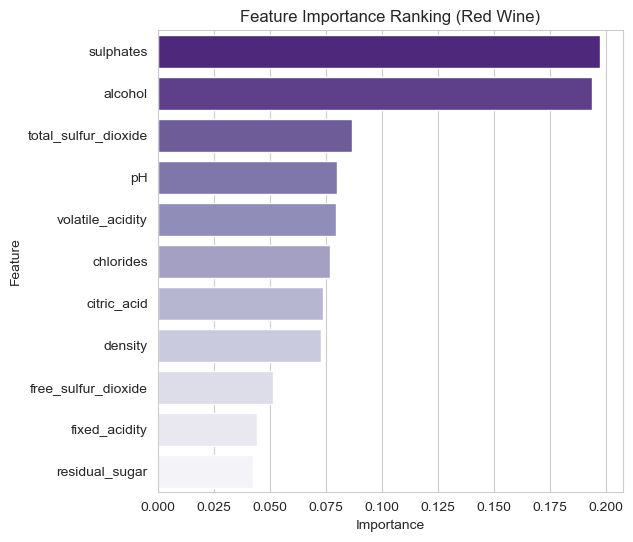

c:\Users\janin\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best RandomForest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Accuracy: 0.8009
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       102
           1       0.82      0.81      0.81       125
           2       0.25      0.50      0.33         4

    accuracy                           0.80       231
   macro avg       0.63      0.70      0.65       231
weighted avg       0.81      0.80      0.81       231



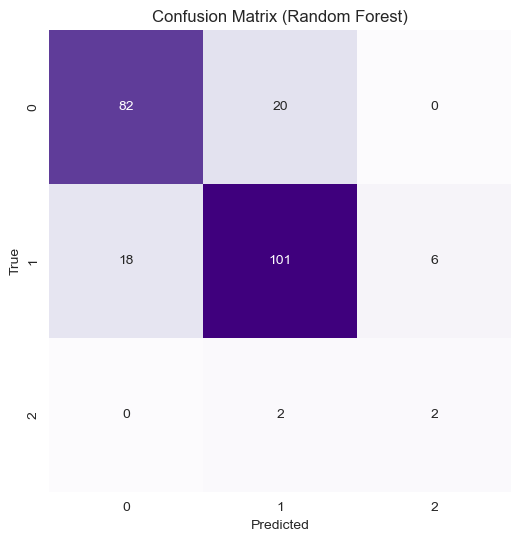

Best SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy: 0.7792
              precision    recall  f1-score   support

           0       0.76      0.85      0.81       102
           1       0.84      0.74      0.78       125
           2       0.14      0.25      0.18         4

    accuracy                           0.78       231
   macro avg       0.58      0.61      0.59       231
weighted avg       0.79      0.78      0.78       231



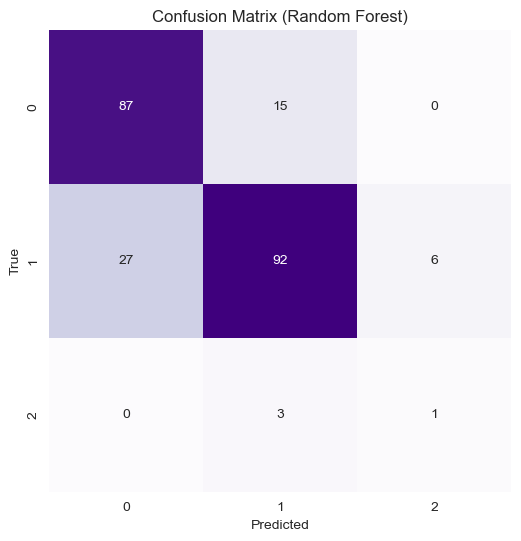

Best ANN: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}
Accuracy: 0.7576
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       102
           1       0.81      0.72      0.76       125
           2       0.22      0.50      0.31         4

    accuracy                           0.76       231
   macro avg       0.59      0.68      0.62       231
weighted avg       0.77      0.76      0.76       231



c:\Users\janin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


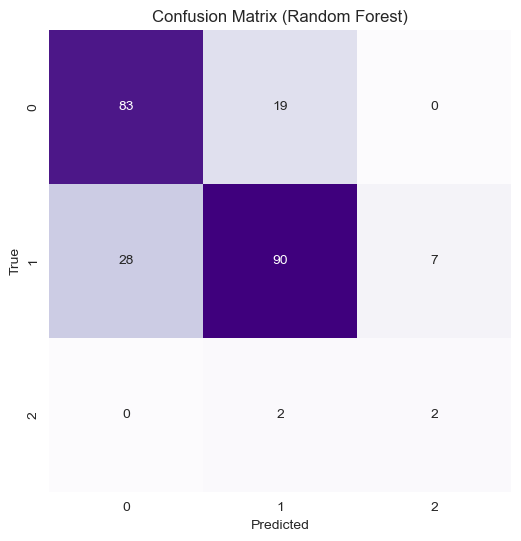

ValueError: Length of values (33) does not match length of index (11)

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

# Load the dataset
X = red_wine_no_out1.drop('quality_label', axis=1)
y = red_wine_no_out1['quality_label']

# Step 1: Balance Data Using SMOTE
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


# Step 2: Feature Selection using RandomForest for initial feature ranking
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_resampled, y_train_resampled)

# Rank feature importance
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance for RandomForest
plt.figure(figsize=(6, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', palette='Purples_r', legend=False)
plt.title('Feature Importance Ranking (Red Wine)')
plt.show()

# Step 3: Standardization
scaler = StandardScaler()
x_train_resampled_scaled = scaler.fit_transform(x_train_resampled)
x_test_scaled = scaler.transform(x_test)

# Step 4: Hyperparameter Tuning and Model Training

# Define parameter grids for each model
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
}

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

param_grid_ann = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 500]
}

# Initialize models
models = {
    'RandomForest': (RandomForestClassifier(random_state=42), param_grid_rf),
    'SVM': (SVC(random_state=42), param_grid_svc),
    'ANN': (MLPClassifier(random_state=42), param_grid_ann)
}

# Tune and evaluate each model using GridSearchCV
best_models = {}
results = {}

for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train_resampled_scaled, y_train_resampled)
    best_models[model_name] = grid_search.best_estimator_
    
    # Predictions and evaluation
    preds = best_models[model_name].predict(x_test_scaled)
    accuracy = accuracy_score(y_test, preds)
    results[model_name] = accuracy
    
    print(f"Best {model_name}: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, preds))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", cbar=False, square=True)
    plt.title("Confusion Matrix (Random Forest)")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Step 5: Feature Impact on Model Performance

# Initialize a DataFrame to hold the feature impact results
feature_impact_df = pd.DataFrame(index=X.columns)

# Collect feature importance for RandomForest
feature_impact_df['RandomForest'] = rf.feature_importances_

# For SVM, we can use the absolute values of the coefficients if using a linear kernel
svc_linear = SVC(kernel='linear').fit(x_train_resampled_scaled, y_train_resampled)
feature_impact_df['SVM'] = np.abs(svc_linear.coef_).flatten()

# For ANN, we do not directly have feature importance, but we can use permutation importance
# from sklearn.inspection import permutation_importance is an option if required for ANN.
# For simplicity, we'll leave ANN without feature-specific ranking.

# Normalizing the results for visualization (0 to 1 range)
feature_impact_df = feature_impact_df.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)

# Plot the performance results for each model against the features
plt.figure(figsize=(12, 6))
for col in feature_impact_df.columns:
    plt.plot(feature_impact_df.index, feature_impact_df[col], marker='o', label=f'{col}-Test')
    
plt.title('Performance Analysis of Features on Different Models')
plt.xlabel('Features')
plt.ylabel('Performance result (in 0-1 range)')
plt.xticks(rotation=45)
plt.legend(title='Keys')
plt.grid(False)
plt.show()
